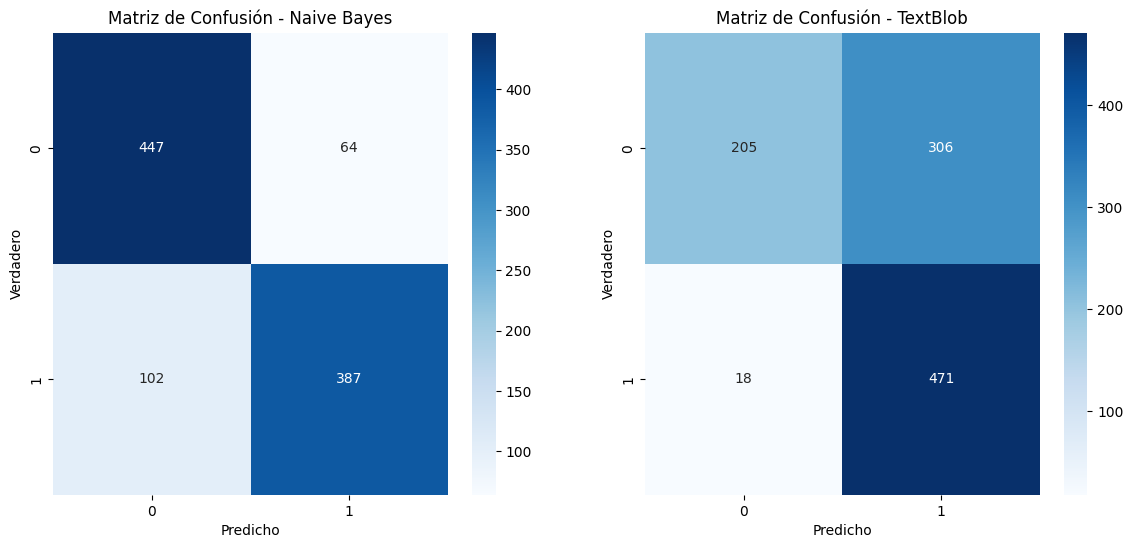

Naive Bayes Accuracy:  0.834
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.87      0.84       511
    positive       0.86      0.79      0.82       489

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000



TextBlob Accuracy:  0.676
TextBlob Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.40      0.56       511
    positive       0.61      0.96      0.74       489

    accuracy                           0.68      1000
   macro avg       0.76      0.68      0.65      1000
weighted avg       0.77      0.68      0.65      1000



In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Cargar datos
df = pd.read_csv('train_.csv')

# Seleccionar 5000 opiniones aleatorias
df_sample = df.sample(n=5000, random_state=1)

# Limpieza básica de datos
df_sample['review'] = df_sample['review'].str.replace('[^\w\s]', '').str.lower()

# Convertir las etiquetas a números
df_sample['sentiment'] = df_sample['sentiment'].map({'positive': 1, 'negative': 0})

# Dividir en conjunto de entrenamiento y prueba
train, test = train_test_split(df_sample, test_size=0.2, random_state=1)

# Vectorización
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train['review'])
X_test = vectorizer.transform(test['review'])

# Entrenamiento del modelo Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, train['sentiment'])

# Predicción y evaluación
predictions_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(test['sentiment'], predictions_nb)
report_nb = classification_report(test['sentiment'], predictions_nb, target_names=['negative', 'positive'])
conf_matrix_nb = confusion_matrix(test['sentiment'], predictions_nb)

# Función para obtener sentimiento con TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return 1 if analysis.sentiment.polarity > 0 else 0

# Aplicar análisis de sentimientos con TextBlob
test['predicted_sentiment_tb'] = test['review'].apply(get_sentiment)

# Evaluación TextBlob
accuracy_tb = accuracy_score(test['sentiment'], test['predicted_sentiment_tb'])
report_tb = classification_report(test['sentiment'], test['predicted_sentiment_tb'], target_names=['negative', 'positive'])
conf_matrix_tb = confusion_matrix(test['sentiment'], test['predicted_sentiment_tb'])

# Graficar matrices de confusión
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Naive Bayes
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Matriz de Confusión - Naive Bayes')
ax[0].set_xlabel('Predicho')
ax[0].set_ylabel('Verdadero')

# TextBlob
sns.heatmap(conf_matrix_tb, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Matriz de Confusión - TextBlob')
ax[1].set_xlabel('Predicho')
ax[1].set_ylabel('Verdadero')

plt.show()

# Resultados
print("Naive Bayes Accuracy: ", accuracy_nb)
print("Naive Bayes Classification Report:\n", report_nb)
print("\n")
print("TextBlob Accuracy: ", accuracy_tb)
print("TextBlob Classification Report:\n", report_tb)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


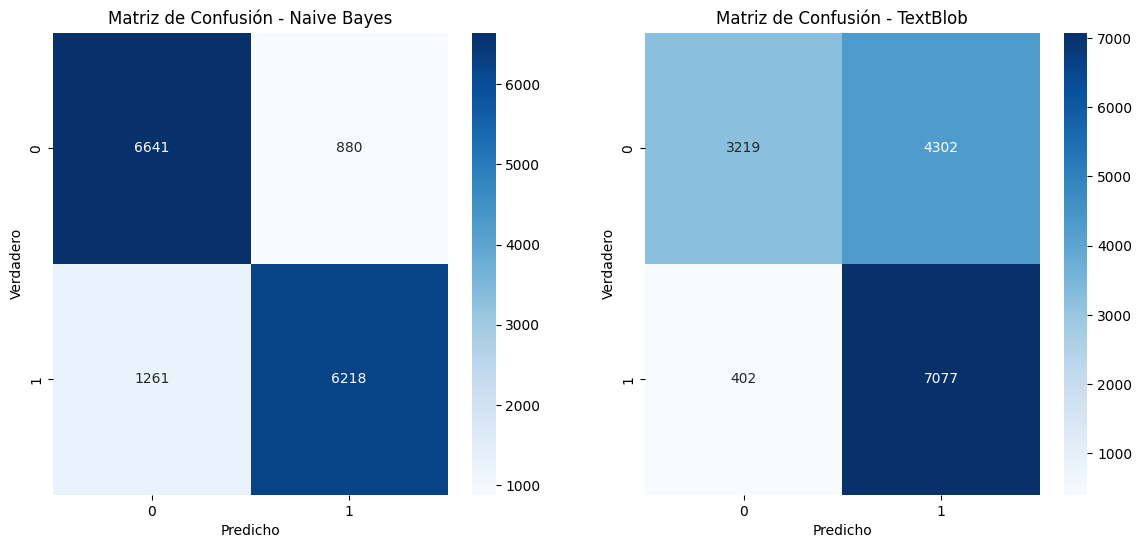

Naive Bayes Accuracy:  0.8572666666666666
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.88      0.86      7521
    positive       0.88      0.83      0.85      7479

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



TextBlob Accuracy:  0.6864
TextBlob Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.43      0.58      7521
    positive       0.62      0.95      0.75      7479

    accuracy                           0.69     15000
   macro avg       0.76      0.69      0.66     15000
weighted avg       0.76      0.69      0.66     15000



In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt


# Cargar datos
data = pd.read_csv('train_.csv')

# Información del DataFrame
print(data.info())

# Mostrar el número de opiniones positivas y negativas
print(data['sentiment'].value_counts())

# Preprocesamiento y tokenización
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), tokenizer=tokenizer.tokenize)
label_counts = cv.fit_transform(data['review'])

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(label_counts, data['sentiment'], test_size=0.3, random_state=1)

# Entrenamiento del modelo Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

# Predicción y evaluación
predicted = clf.predict(X_test)
accuracy_nb = metrics.accuracy_score(y_test, predicted)
report_nb = metrics.classification_report(y_test, predicted)
conf_matrix_nb = metrics.confusion_matrix(y_test, predicted)

# Función para obtener sentimiento con TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative'

# Aplicar análisis de sentimientos con TextBlob
data['predicted_sentiment_tb'] = data['review'].apply(get_sentiment)

# Evaluación TextBlob
test_data = data.sample(frac=0.3, random_state=1)
accuracy_tb = metrics.accuracy_score(test_data['sentiment'], test_data['predicted_sentiment_tb'])
report_tb = metrics.classification_report(test_data['sentiment'], test_data['predicted_sentiment_tb'])
conf_matrix_tb = metrics.confusion_matrix(test_data['sentiment'], test_data['predicted_sentiment_tb'])

# Graficar matrices de confusión
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Naive Bayes
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Matriz de Confusión - Naive Bayes')
ax[0].set_xlabel('Predicho')
ax[0].set_ylabel('Verdadero')

# TextBlob
sns.heatmap(conf_matrix_tb, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Matriz de Confusión - TextBlob')
ax[1].set_xlabel('Predicho')
ax[1].set_ylabel('Verdadero')

plt.show()

# Resultados
print("Naive Bayes Accuracy: ", accuracy_nb)
print("Naive Bayes Classification Report:\n", report_nb)
print("\n")
print("TextBlob Accuracy: ", accuracy_tb)
print("TextBlob Classification Report:\n", report_tb)
